In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.preprocessing import text, sequence

## Input data from https://github.com/mankutimma/text-emotion-classification/tree/master/data

In [2]:
train_df = pd.read_csv('data/text_emotion_train_val_set.csv')
train_df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [3]:
train_df = train_df.drop(['tweet_id', 'author'], axis=1)
train_df.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [4]:
train_df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [5]:
train_df_1_anger = pd.read_csv('data/anger-ratings-0to1.test.gold.txt', error_bad_lines=False, sep='\t', header=None)
train_df_1_anger.head()

,0,1,2,3
0,10941,At the point today where if someone says somet...,anger,0.319
1,10942,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger,0.144
2,10943,This game has pissed me off more than any othe...,anger,0.898
3,10944,@spamvicious I've just found out it's Candice ...,anger,0.271
4,10945,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.646


In [6]:
train_df_1_anger.columns = ['tweet_id', 'content', 'sentiment', 'sentiment_intensity']
train_df_1_anger.head()

,tweet_id,content,sentiment,sentiment_intensity
0,10941,At the point today where if someone says somet...,anger,0.319
1,10942,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger,0.144
2,10943,This game has pissed me off more than any othe...,anger,0.898
3,10944,@spamvicious I've just found out it's Candice ...,anger,0.271
4,10945,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.646


In [7]:
train_df_1_anger = train_df_1_anger[train_df_1_anger.sentiment_intensity > 0.5]

In [8]:
train_df_1_anger.head()

,tweet_id,content,sentiment,sentiment_intensity
2,10943,This game has pissed me off more than any othe...,anger,0.898
4,10945,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.646
5,10946,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.583
7,10948,@virginmedia I've been disconnected whilst on ...,anger,0.625
11,10952,@eMilsOnWheels I'm furious 😩😩😩,anger,0.708


In [9]:
train_df_1_anger = train_df_1_anger.drop(['sentiment_intensity', 'tweet_id'], axis=1)
train_df_1_anger.head()

,content,sentiment
2,This game has pissed me off more than any othe...,anger
4,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger
5,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger
7,@virginmedia I've been disconnected whilst on ...,anger
11,@eMilsOnWheels I'm furious 😩😩😩,anger


In [10]:
train_df = [train_df, train_df_1_anger]

In [11]:
train_df = pd.concat(train_df)

In [12]:
train_df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
anger          460
boredom        179
Name: sentiment, dtype: int64

In [13]:
train_df.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [14]:
train_df.tail()

,sentiment,content
751,anger,@kylemuir17 @Ealvarezfight @danawhite @TheNoto...
752,anger,@CallofDuty how do u guys determine teams? Cau...
753,anger,@CallofDuty how do u guys determine teams? Cau...
755,anger,@ggreenwald What if the supposed animosity is ...
757,anger,Id love 2 c Gyimah in action but his coach is ...


In [15]:
train_df_2_anger = pd.read_csv('data/anger-ratings-0to1.train.txt', error_bad_lines=False, sep='\t', header=None)

In [16]:
train_df_2_anger.head()

,0,1,2,3
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [17]:
train_df_2_anger.columns = ['tweet_id', 'content', 'sentiment', 'sentiment_intensity']

In [18]:
train_df_2_anger.head()

,tweet_id,content,sentiment,sentiment_intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [19]:
train_df_2_anger = train_df_2_anger[train_df_2_anger.sentiment_intensity >= 0.5]
train_df_2_anger.head()

,tweet_id,content,sentiment,sentiment_intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [20]:
train_df_2_anger = train_df_2_anger.drop(['tweet_id', 'sentiment_intensity'], axis=1)
train_df_2_anger.head()

,content,sentiment
0,How the fu*k! Who the heck! moved my fridge!.....,anger
1,So my Indian Uber driver just called someone t...,anger
2,@DPD_UK I asked for my parcel to be delivered ...,anger
3,so ef whichever butt wipe pulled the fire alar...,anger
4,Don't join @BTCare they put the phone down on ...,anger


In [21]:
train_df = [train_df, train_df_2_anger]
train_df = pd.concat(train_df)

In [22]:
train_df.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [23]:
train_df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
anger          871
empty          827
enthusiasm     759
boredom        179
Name: sentiment, dtype: int64

In [24]:
train_df_1_fear = pd.read_csv('data/fear-ratings-0to1.test.gold.txt', error_bad_lines=False, sep='\t', header=None)
train_df_2_fear = pd.read_csv('data/fear-ratings-0to1.train.txt', error_bad_lines=False, sep='\t', header=None)
train_df_fear = [train_df_1_fear, train_df_2_fear]
train_df_fear = pd.concat(train_df_fear)
train_df_fear.columns = ['tweet_id', 'content', 'sentiment', 'sentiment_intensity']
train_df_fear = train_df_fear[train_df_fear.sentiment_intensity >= 0.5]
train_df_fear = train_df_fear.drop(['tweet_id', 'sentiment_intensity'], axis=1)

In [25]:
train_df_fear.head()

,content,sentiment
2,Be #afraid of the #quiet ones they are the one...,fear
3,@riinkanei he's a horrible person and now i ga...,fear
6,a pedicure is supposed to be nice but honestly...,fear
7,US you need to band together not apart #nevert...,fear
8,US you need to band together not apart #nevert...,fear


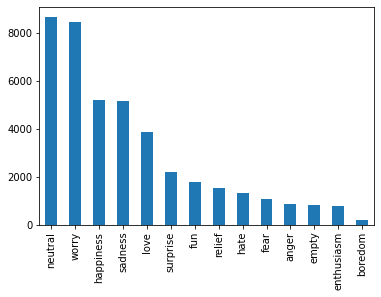

In [26]:
train_df = [train_df, train_df_fear]
train_df = pd.concat(train_df)
train_df['sentiment'].value_counts().plot.bar()

In [27]:
train_df = train_df.sample(frac=1).reset_index(drop=True)

In [28]:
train_df.head()

,sentiment,content
0,happiness,@ragazza_matta take my &quot;how well do you k...
1,sadness,piecing a photo quilt for Boeing employees to ...
2,sadness,is suprisingly okay. or possibly still drunk. ...
3,surprise,Bah I don't think @bing's FB fan page will get...
4,relief,out of office on business....needed the get away


In [35]:
list_of_classes = ['anger', 'boredom', 'empty', 'enthusiasm', 'fear', 'fun', 'happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry']

df_0 = train_df[train_df['sentiment'] == list_of_classes[0]][:1000]
df_1 = train_df[train_df['sentiment'] == list_of_classes[1]][:1000]
df_2 = train_df[train_df['sentiment'] == list_of_classes[2]][:1000]
df_3 = train_df[train_df['sentiment'] == list_of_classes[3]][:1000]
df_4 = train_df[train_df['sentiment'] == list_of_classes[4]][:1000]
df_5 = train_df[train_df['sentiment'] == list_of_classes[5]][:1000]
df_6 = train_df[train_df['sentiment'] == list_of_classes[6]][:1000]
df_7 = train_df[train_df['sentiment'] == list_of_classes[7]][:1000]
df_8 = train_df[train_df['sentiment'] == list_of_classes[8]][:1000]
df_9 = train_df[train_df['sentiment'] == list_of_classes[9]][:1000]
df_10 = train_df[train_df['sentiment'] == list_of_classes[10]][:1000]
df_11 = train_df[train_df['sentiment'] == list_of_classes[11]][:1000]
df_12 = train_df[train_df['sentiment'] == list_of_classes[12]][:1000]
df_13 = train_df[train_df['sentiment'] == list_of_classes[13]][:1000]

df = pd.concat([df_0, df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12, df_13])

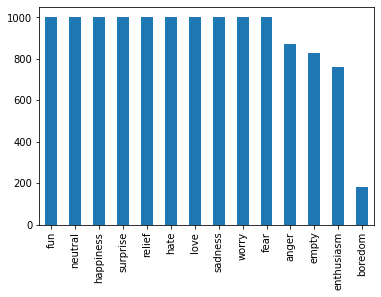

In [36]:
df['sentiment'].value_counts().plot.bar()

In [37]:
df.to_csv(r'/Users/kevinlotan/documents/development/python/machine-learning/Emotion Classifier/clean-data.csv')